# Задание
1. Изучить пример, приведенный ниже.
2. Получить свой датасет у преподавателя.
3. Выбрать числовые признаки и таргет в датасете (признаки делаем числовыми или исключаем их).
2. Проанализировать результаты, полученные с помощью statsmodels.
3. Построить регрессионную зависимость (sklearn [тык](https://scikit-learn.ru/user_guide/)) с помощью метода наименьших квадратов, используя вычисление обратной матрицы. 
4. Построить регрессионную зависимость (sklearn) с помощью метода наименьших квадратов, используя метод градиентного спуска. 
4. Сравнить и описать результаты.

# Регрессионный анализ
[Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline

Немного о pandas

[Документация](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) 

[Шпаргалка](https://smysl.io/blog/pandas/) 

[Еще немного](https://blog.skillfactory.ru/kak-nachat-analizirovat-dannye-v-pandas-pervye-shagi/)

[Работа с датой](https://habr.com/ru/company/wunderfund/blog/677068/)

In [2]:
df = pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 43824
Total number of columns in dataset = 13


In [4]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
df['cbwd'] = df['cbwd'].replace('NW', 1)
df['cbwd'] = df['cbwd'].replace('cv', 2)
df['cbwd'] = df['cbwd'].replace('NE', 3)
df['cbwd'] = df['cbwd'].replace('SE', 4)

In [7]:
df['cbwd'] = df['cbwd'].astype(float)

In [8]:
df['pm2.5'] = df['pm2.5'].fillna(1)

In [9]:
target_col = "PRES"

In [10]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [11]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


# Линейная регрессия (statsmodels)



In [12]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [13]:
results = model.fit()
results.params

const    899537.534736
No            0.050997
year       -447.004088
month       -36.924972
day          -1.206934
hour         -0.006505
pm2.5        -0.007379
DEWP         -0.204855
TEMP         -0.496377
cbwd          0.364554
Iws          -0.000137
Is            0.051944
Ir           -0.129746
dtype: float64

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   PRES   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     7165.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:29:00   Log-Likelihood:                -94420.
No. Observations:               30676   AIC:                         1.889e+05
Df Residuals:                   30663   BIC:                         1.890e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.995e+05   3.77e+04     23.837      0.0

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3 + b4∙d4 + b5∙d5 + b6∙d6 + b7∙d7 + b8∙d8 + b9∙d9 + b10∙d10 + b11∙d11 + b12∙d12:



> Intercept = b0 = 8.995e+05

>b1 = 0.0510
>b2 = -447.0041 
>b3 = -36.9250
>b4 = -1.2069
>b5 = -0.0065
>b6 = -0.0074
>b7 = -0.2049 
>b8 = -0.4964
>b9 = 0.3646
>b10 = -0.0001
>b11 = 0.0519
>b12 = -0.1297


2. Коэффициент детерминации R-squared = 0.737, его скорректированная оценка Adj. R-squared = 0.737 - это означает, что регрессионная модель объясняет 90% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 7165.

>расчетный уровень значимости Prob (F-statistic) = 0.00

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b0, b1, b2, b3, b4, b6, b7, b8, b9, b12 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для b5, b10, b11 превышает 0.05. Нулевая гипотеза не отвергается. b5, b10, b11 не являются значимыми.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t для b5, b10, b11 очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 

# Ваше задание
Удаляем признаки, которые не являются значимыми, и повторяем обучение без них.

In [15]:
del df['hour']
del df['Iws']
del df['Is']
del df['year']
del df['TEMP']
del df['No']

In [16]:
df.head()

,month,day,pm2.5,DEWP,PRES,cbwd,Ir
0,1,1,1.0,-21,1021.0,1.0,0
1,1,1,1.0,-21,1020.0,1.0,0
2,1,1,1.0,-21,1019.0,1.0,0
3,1,1,1.0,-21,1019.0,1.0,0
4,1,1,1.0,-20,1018.0,1.0,0


In [17]:
target_col = "PRES"

In [18]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [19]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [20]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [21]:
results = model.fit()
results.params

const    1013.592922
month       0.407886
day         0.011049
pm2.5       0.009853
DEWP       -0.589523
cbwd        0.068406
Ir          0.180093
dtype: float64

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   PRES   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     8762.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:29:15   Log-Likelihood:                -99598.
No. Observations:               30676   AIC:                         1.992e+05
Df Residuals:                   30669   BIC:                         1.993e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1013.5929      0.134   7564.925      0.0

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3 + b4∙d4 + b5∙d5 + b6∙d6:



> Intercept = b0 = 1013.7460


>b1 = 0.4079 
>b2 = 0.0110 
>b3 = 0.0099
>b4 = -0.5895
>b5 = 0.0684
>b6 = 0.1801




2. Коэффициент детерминации R-squared = 0.632, его скорректированная оценка Adj. R-squared = 0.631 - это означает, что регрессионная модель объясняет 90% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 8762.

>расчетный уровень значимости Prob (F-statistic) = 0.00

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b0, b1, b2, b3, b4, b5, b6 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| не превышает 0.05 ни один параметр. Все параметры являются значимыми. 

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 

In [23]:
X_test = sm.add_constant(X_test)

In [24]:
y_pred = results.predict(X_test)

In [25]:
residual = y_test - y_pred

# Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В ином случае наша модель не будет адекватна поставленной задаче, и ее использование будет бессмысленно.

# Наличие линейной зависимости
Первая и самая естественная предпосылка заключается в линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

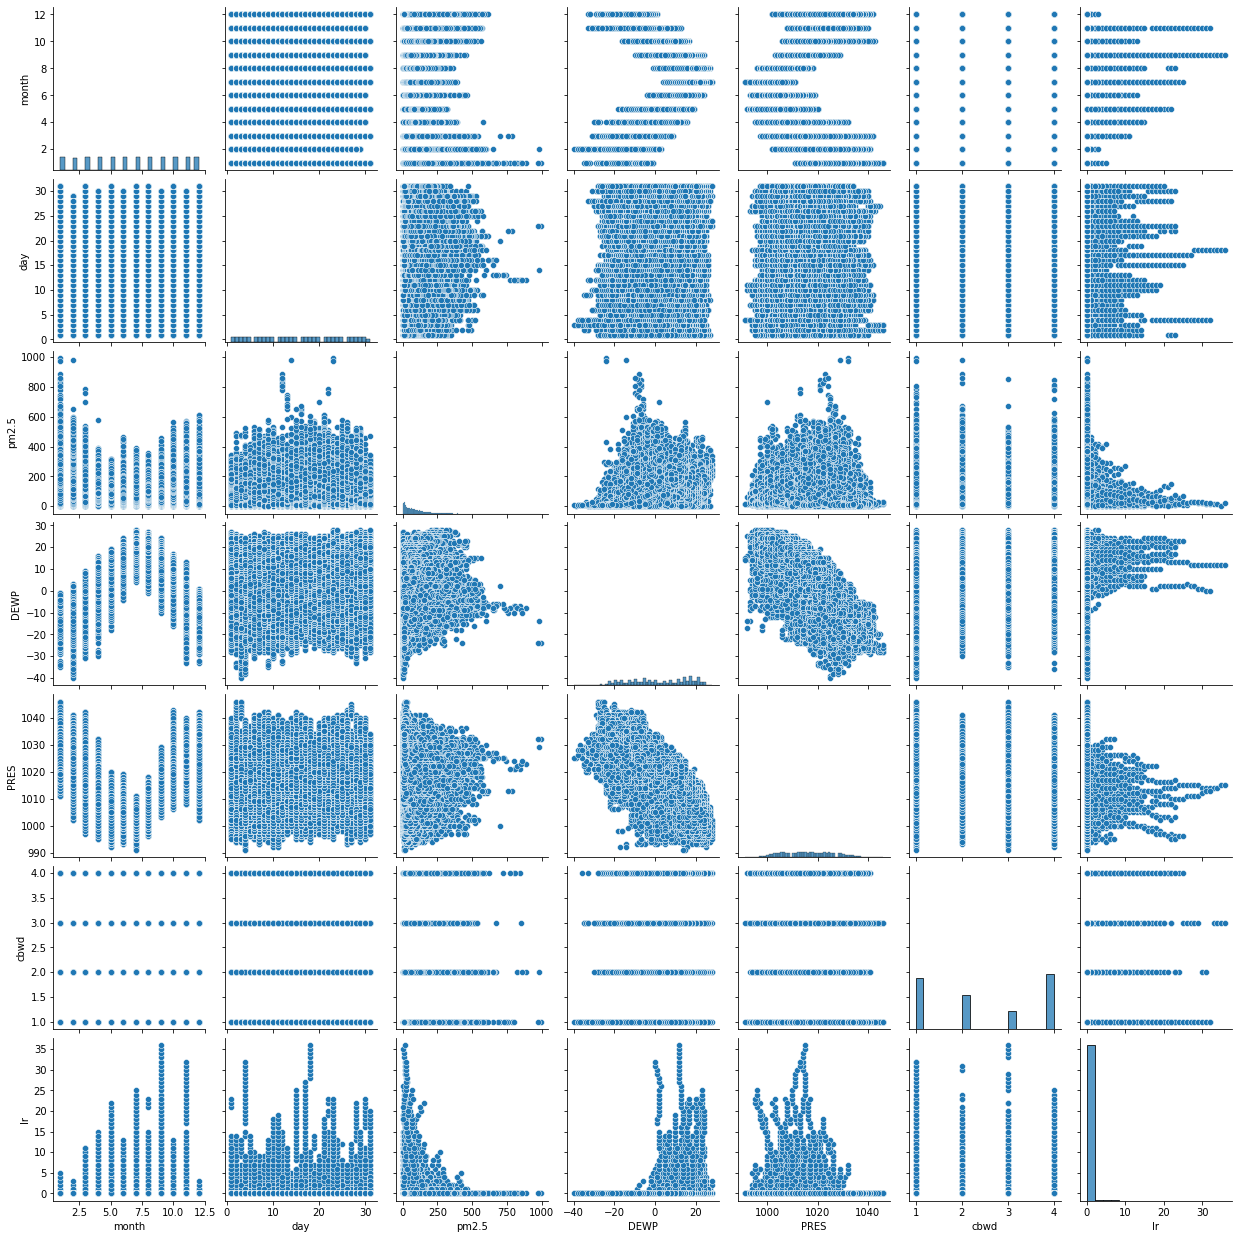

In [26]:
sns.pairplot(df)

# Отсутствие мультиколлинеарности

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами). Такое может возникать, например, при использовании признаков с естественной взаимосвязью: стаж работы и возраст (как правило, чем больше возраст - тем больше стаж и наоборот), количество детских садов и количество школ в районе (обычно детские сады бывают при школе, так что эти количества пропорционально взаимосвязаны) или баллы за экзамены IELTS и TOEFL (так как они экзамены проверяют примерно одни и те же знания и навыки)

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Разумеется, это не очень хорошая для нас ситуация, поэтому мы должны отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данную предпосылку, нам необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

Почитать:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[статья](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [27]:
cols_num = ['month', 'day', 'pm2.5', 'DEWP', 'cbwd', 'Ir']

correlation = df.corr().loc[cols_num, cols_num]
correlation

,month,day,pm2.5,DEWP,cbwd,Ir
month,1.000000,0.010796,-0.025796,0.233975,-0.068989,0.036737
day,0.010796,1.000000,0.073777,0.028559,0.015103,0.002681
pm2.5,-0.025796,0.073777,1.000000,0.158378,0.137229,-0.048979
DEWP,0.233975,0.028559,0.158378,1.000000,0.325865,0.125090
cbwd,-0.068989,0.015103,0.137229,0.325865,1.000000,-0.034542
Ir,0.036737,0.002681,-0.048979,0.125090,-0.034542,1.000000


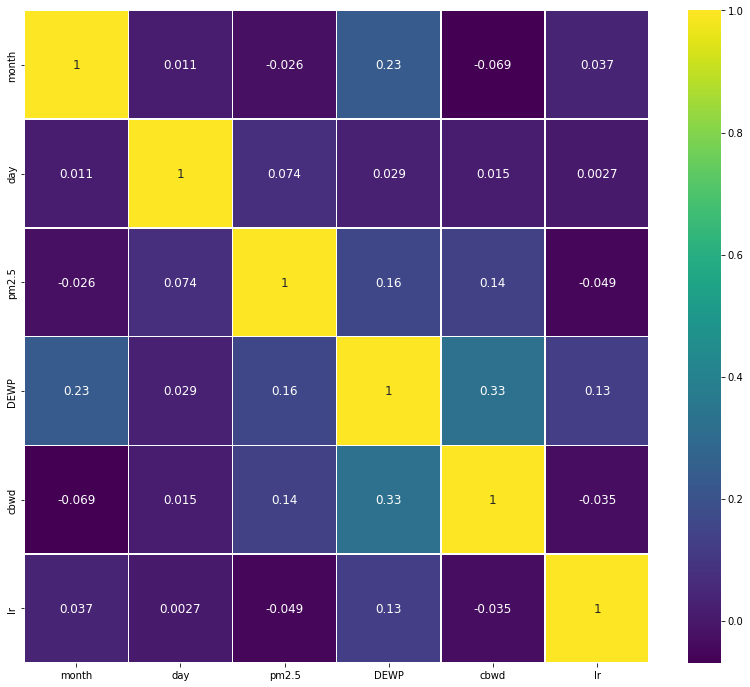

In [28]:

fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Фактор инфляции дисперсии

vif > 10 - выраженная мультиколлинеарность

In [29]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,month,day,pm2.5,DEWP,cbwd,Ir
vif,3.141485,3.375971,2.028343,1.120923,3.553419,1.038046


Так как у столбцов year и TEMP значения равны 0.98 и 0.82
Я их удаляю.

# Нормальное распределение ошибок
После того как мы построили модель регрессии, мы можем вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

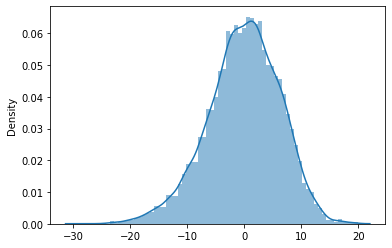

In [30]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

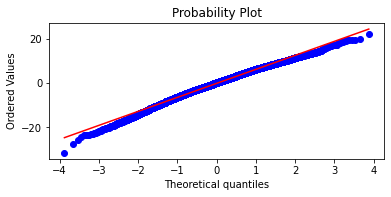

In [31]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [32]:
np.mean(residual)

-0.1342293964983386

# Гомоскедастичность 
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый. 

Если предположение о гомоскедастичности нарушается, т.е. имеет место гетероскедастичность, это может затруднить интерпретацию результатов регрессии, поскольку в этом случае значение выходной переменной зависит не только от величины изменения входной, но и от того, относительно какой величины это изменение происходит.

Например, если использовать при построении регрессионной модели данные о доходе клиентов, то попытка применить одну модель для богатых и бедных может вызвать проблемы. Действительно, если изменение суммы дохода на 1 000 руб. окажется значимым для клиента с доходом 10 000 руб., то для клиента с доходом 1 000 000 руб. это не так. А регрессионная модель, тем не менее, применяет к ним одну и ту же закономерность. Чтобы этого не произошло, клиентов с низкими и высокими доходами следует разбить на две выборки и таким образом обеспечить гомоскедастичность.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

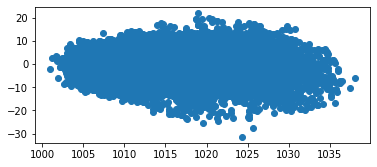

In [33]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

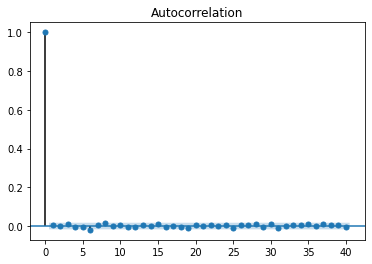

In [34]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()


## Матрицами ([статья](https://habr.com/en/post/479398/))

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [35]:
df.shape

(43824, 7)

In [38]:
X = df.drop('PRES', axis=1) #удаляю таргет 
X

,month,day,pm2.5,DEWP,cbwd,Ir,Ed
0,1,1,1.0,-21,1.0,0,1
1,1,1,1.0,-21,1.0,0,1
2,1,1,1.0,-21,1.0,0,1
3,1,1,1.0,-21,1.0,0,1
4,1,1,1.0,-20,1.0,0,1
...,...,...,...,...,...,...,...
43819,12,31,8.0,-23,1.0,0,1
43820,12,31,10.0,-22,1.0,0,1
43821,12,31,10.0,-22,1.0,0,1
43822,12,31,8.0,-22,1.0,0,1


In [37]:
df['Ed'] = np.ones(43824, dtype=int) #добавляю столбец единиц

In [39]:
Y = df['PRES'] #присваиваю Y свой таргет 
Y

0        1021.0
1        1020.0
2        1019.0
3        1019.0
4        1018.0
          ...  
43819    1034.0
43820    1034.0
43821    1034.0
43822    1034.0
43823    1034.0
Name: PRES, Length: 43824, dtype: float64

In [40]:
X = np.array(X)
Y = np.array(Y)

In [41]:
#считаю по формуле
xxt = np.dot(X.T, X)
xxt_inv = np.linalg.inv(xxt)
xxt_inv_xxt = np.dot(xxt_inv, X.T)
betas = np.dot(xxt_inv_xxt, Y)
betas

array([ 3.99439449e-01,  9.85592432e-03,  9.85515109e-03, -5.90776630e-01,
        8.53435184e-02,  1.72428468e-01,  1.01358797e+03])

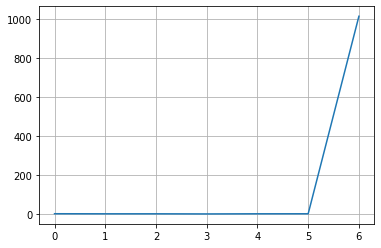

In [42]:
fig, ax = plt.subplots()
ax.plot(betas)
ax.grid()
plt.show()

# Линейная регрессия (sklearn)

In [43]:
from sklearn import linear_model 
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [44]:
reg = LinearRegression().fit(X, Y)

In [45]:
print('intercept:', reg.intercept_) #b0

intercept: 1013.5879677489899


In [46]:
reg.coef_ #b1, b2, b3, b4, b5, b6

array([ 0.39943945,  0.00985592,  0.00985515, -0.59077663,  0.08534352,
        0.17242847,  0.        ])

## Градиентным спуском  ([статья](https://habr.com/en/post/474602/))

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [177]:
import numpy as np
import random

def gradientDescent(x, y, theta, alpha, m, numIterations):
     xTrans = x.transpose()
     for i in range(0, numIterations):
         hypothesis = np.dot(x, theta)
         loss = hypothesis - y
         # функция стоимости
         cost = np.sum(loss ** 2) / (2 * m)
         print("Iteration %d | Cost: %f" % (i, cost))
         gradient = np.dot(xTrans, loss) / m
         # обновление значений 
         theta -= alpha * gradient
     return theta
df['Ed'] = np.ones(43824, dtype=int)
x = df.drop('PRES', axis=1)
y = df['PRES']
m, n = np.shape(X_with_constant)
numIterations= 10000 # количество итераций
alpha = 0.0000000000115 # подбирается такое значение, при котором происходит уменьшение "цены"
theta = np.zeros(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

Выходные данные были обрезаны до нескольких последних строк (5000).
Iteration 5002 | Cost: 736964.361441
Iteration 5003 | Cost: 736964.140686
Iteration 5004 | Cost: 736963.919931
Iteration 5005 | Cost: 736963.699175
Iteration 5006 | Cost: 736963.478420
Iteration 5007 | Cost: 736963.257665
Iteration 5008 | Cost: 736963.036910
Iteration 5009 | Cost: 736962.816156
Iteration 5010 | Cost: 736962.595401
Iteration 5011 | Cost: 736962.374646
Iteration 5012 | Cost: 736962.153892
Iteration 5013 | Cost: 736961.933138
Iteration 5014 | Cost: 736961.712384
Iteration 5015 | Cost: 736961.491630
Iteration 5016 | Cost: 736961.270876
Iteration 5017 | Cost: 736961.050122
Iteration 5018 | Cost: 736960.829369
Iteration 5019 | Cost: 736960.608615
Iteration 5020 | Cost: 736960.387862
Iteration 5021 | Cost: 736960.167108
Iteration 5022 | Cost: 736959.946355
Iteration 5023 | Cost: 736959.725602
Iteration 5024 | Cost: 736959.504850
Iteration 5025 | Cost: 736959.284097
Iteration 5026 | Cost: 736959.063344
Iterati

# Тут будет описание

Первым шагом я загрузила свой датасет. Изменила значения Nan, а также преобразовала все строковые значения в числовые (float или int). После этого, я перешла к statesmodels, в итоге было выявлено, что достаточно большой коэффициент значимости у столбца PRES, поэтому он был удален из выборки. После данных преобразований, был произведен анализ на гомоскедатичность, автокорреляцию и отсутствие автокорреляционных остатков. Затем, были найдены коэффициенты регрессии 3-я способами: 1. матричный способ, 2. с помощью LinealRegression() и 3. с помощью градиентного спуска.  Результаты statsmodels, matrix, sklearn, gradient descent приведены ниже. 

In [178]:
comparison_table = pd.DataFrame({"bn": ['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6'],
                                 "statsmodels": [1013.7460, 0.4079, 0.0110, 0.0099, -0.5895, 0.0684, 0.1801],
                                 "matrix": [1.01358797e+03, 3.99439449e-01,  9.85592432e-03,  9.85515109e-03, -5.90776630e-01, 8.53435184e-02,  1.72428468e-01],
                                 "linear regression": [1013.5879677489899, 0.39943945,  0.00985592,  0.00985515, -0.59077663,  0.08534352, 0.17242847],
                                 "gradient descent": [1013.6879677489899, 0.37543945,  0.00956491,  0.00985, -0.587846,  0.07534352, 0.18024]})
comparison_table

,bn,statsmodels,matrix,linear regression,gradient descent
0,b0,1013.7460,1013.587970,1013.587968,1013.687968
1,b1,0.4079,0.399439,0.399439,0.375439
2,b2,0.0110,0.009856,0.009856,0.009565
3,b3,0.0099,0.009855,0.009855,0.009850
4,b4,-0.5895,-0.590777,-0.590777,-0.587846
5,b5,0.0684,0.085344,0.085344,0.075344
6,b6,0.1801,0.172428,0.172428,0.180240


# По материалам
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. Еще каких-то хороших людей